# All kinds of network things 

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import regex as re 
from os import listdir
from os.path import isfile, join
import json 
# get files in directory 
onlyfiles = [f for f in listdir("wiki_content") if isfile(join("wiki_content", f))]

In [2]:
''' Extract links '''
theo_dict  = {}
for file in onlyfiles:
    with open(f'wiki_content/{file}','r', encoding = 'utf-8') as f:
        txt = f.read()
        links = re.findall('\[\[(.*?)(?:\|.*?)?]]', txt)
        name = file.split('.txt')[0].replace('_',' ')
        theo_dict.update({name:links}) 

In [3]:
''' Hvordan linker de til hinanden '''
# Sætter .replace('_', ' ') på name, for at have styr på fx 'Anselm_Strauss' links 
link_dict = {theorist:[_name.replace('_', ' ') for _name in links if _name.replace('_', ' ') in theo_dict.keys()]\
             for theorist, links in theo_dict.items()}

''' Link list '''
link_list = [(node_a, node_b) for node_a, nodes in link_dict.items() for node_b in nodes]

In [4]:
''' Get science attribute '''

with open('science_name_dict.json', 'r', encoding = 'utf-8') as f: 
    science_dict = json.load(f)
    
''' Get those that are in multiple scientific field lists - Marx is in both... '''

socs = set(science_dict['soc'])
anths = set(science_dict['anth'])
ecos = set(science_dict['eco'])
psys = set(science_dict['psy'])
pols = set(science_dict['pol'])

seen = []
repeated = []
for l in [socs, anths, ecos, psys, pols]:
    for i in l: # loop over de enkelte guys'n'gals
        if i in seen:
            repeated.append(i)
        else:
            seen.append(i)

''' Inverse the dict '''
inv_science_dict = {name:science for science, names in science_dict.items() for name in names}
''' change the scientific field to "both" if they are both in the soc and anth list '''
inv_science_dict = {name:('multiple' if name in repeated else sci)\
                    for name, sci in inv_science_dict.items()}

# Match keys to link_dict --> when importing link_dict, 'Anselm_Strauss' becomes 'Anselm Strauss'
# but in the inv_science_dict he is 'Anselm_Strauss'. So it is a mess without it   
inv_science_dict = {key.replace('_', ' '):val for key, val in inv_science_dict.items()}

In [5]:
''' Make network '''
import networkx as nx
import netwulf as nw
G = nx.DiGraph()
G.add_nodes_from(link_dict.keys())
G.add_edges_from(link_list)
nx.set_node_attributes(G, inv_science_dict, name = 'group') # node attributes 

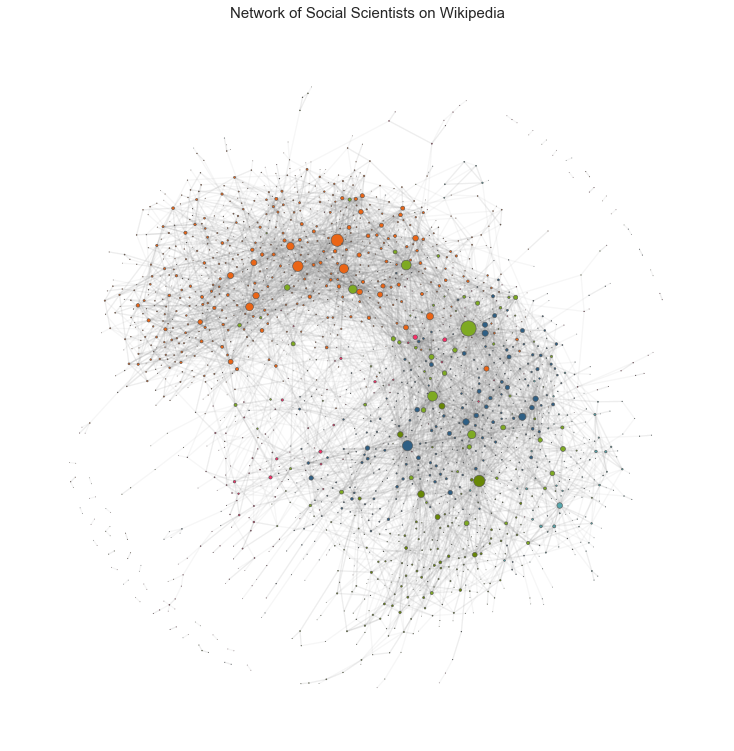

In [12]:
''' Plot network '''
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn-white')

network, config = nw.visualize(G, plot_in_cell_below=False)
fig, ax = nw.draw_netwulf(network, figsize = 10)
plt.title('Network of Social Scientists on Wikipedia', size = 15)
plt.show()

In [9]:
import json
with open('network_configs.json', 'w', encoding = 'utf-8') as f:
    json.dump(network, f)

In [10]:
network

{'xlim': [0, 904],
 'ylim': [0, 904],
 'linkColor': '#7c7c7c',
 'linkAlpha': 0.0797702616464582,
 'nodeStrokeColor': '#555555',
 'nodeStrokeWidth': 0.30753031269942566,
 'links': [{'source': 'A. Doak Barnett',
   'target': 'Harry Harding (political scientist)',
   'width': 1.2527306105084024,
   'weight': 1},
  {'source': 'A. F. K. Organski',
   'target': 'Bruce Bueno de Mesquita',
   'width': 1.2527306105084024,
   'weight': 1},
  {'source': 'A. H. J. Prins',
   'target': 'Raymond Firth',
   'width': 1.2527306105084024,
   'weight': 1},
  {'source': 'A. H. J. Prins',
   'target': 'Audrey Richards',
   'width': 1.2527306105084024,
   'weight': 1},
  {'source': 'A. H. J. Prins',
   'target': 'Harold E. Lambert',
   'width': 1.2527306105084024,
   'weight': 1},
  {'source': 'A. L. Kroeber',
   'target': 'Franz Boas',
   'width': 1.2527306105084024,
   'weight': 1},
  {'source': 'A. L. Kroeber',
   'target': 'Cora Du Bois',
   'width': 1.2527306105084024,
   'weight': 1},
  {'source': 'Aa

In [7]:
print(config)

{'zoom': 0.79, 'node_charge': -100, 'node_gravity': 0.33843863007870667, 'link_distance': 2.7218464156562434, 'link_distance_variation': 0, 'node_collision': True, 'wiggle_nodes': False, 'freeze_nodes': False, 'node_fill_color': '#79aaa0', 'node_stroke_color': '#555555', 'node_label_color': '#000000', 'display_node_labels': False, 'scale_node_size_by_strength': True, 'node_size': 14.879812805786003, 'node_stroke_width': 0.389278876834716, 'node_size_variation': 0.5, 'link_color': '#7c7c7c', 'link_width': 1.585734950010636, 'link_alpha': 0.0797702616464582, 'link_width_variation': 0.5, 'display_singleton_nodes': False, 'min_link_weight_percentile': 0, 'max_link_weight_percentile': 1}


In [7]:
import json
with open('network_configs.json', 'r', encoding = 'utf-8') as f:
    network = json.load(f)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

<ipython-input-42-502983827bf8>:26: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  plt.savefig('title2.pdf', dpi=None, facecolor='w', edgecolor='w',


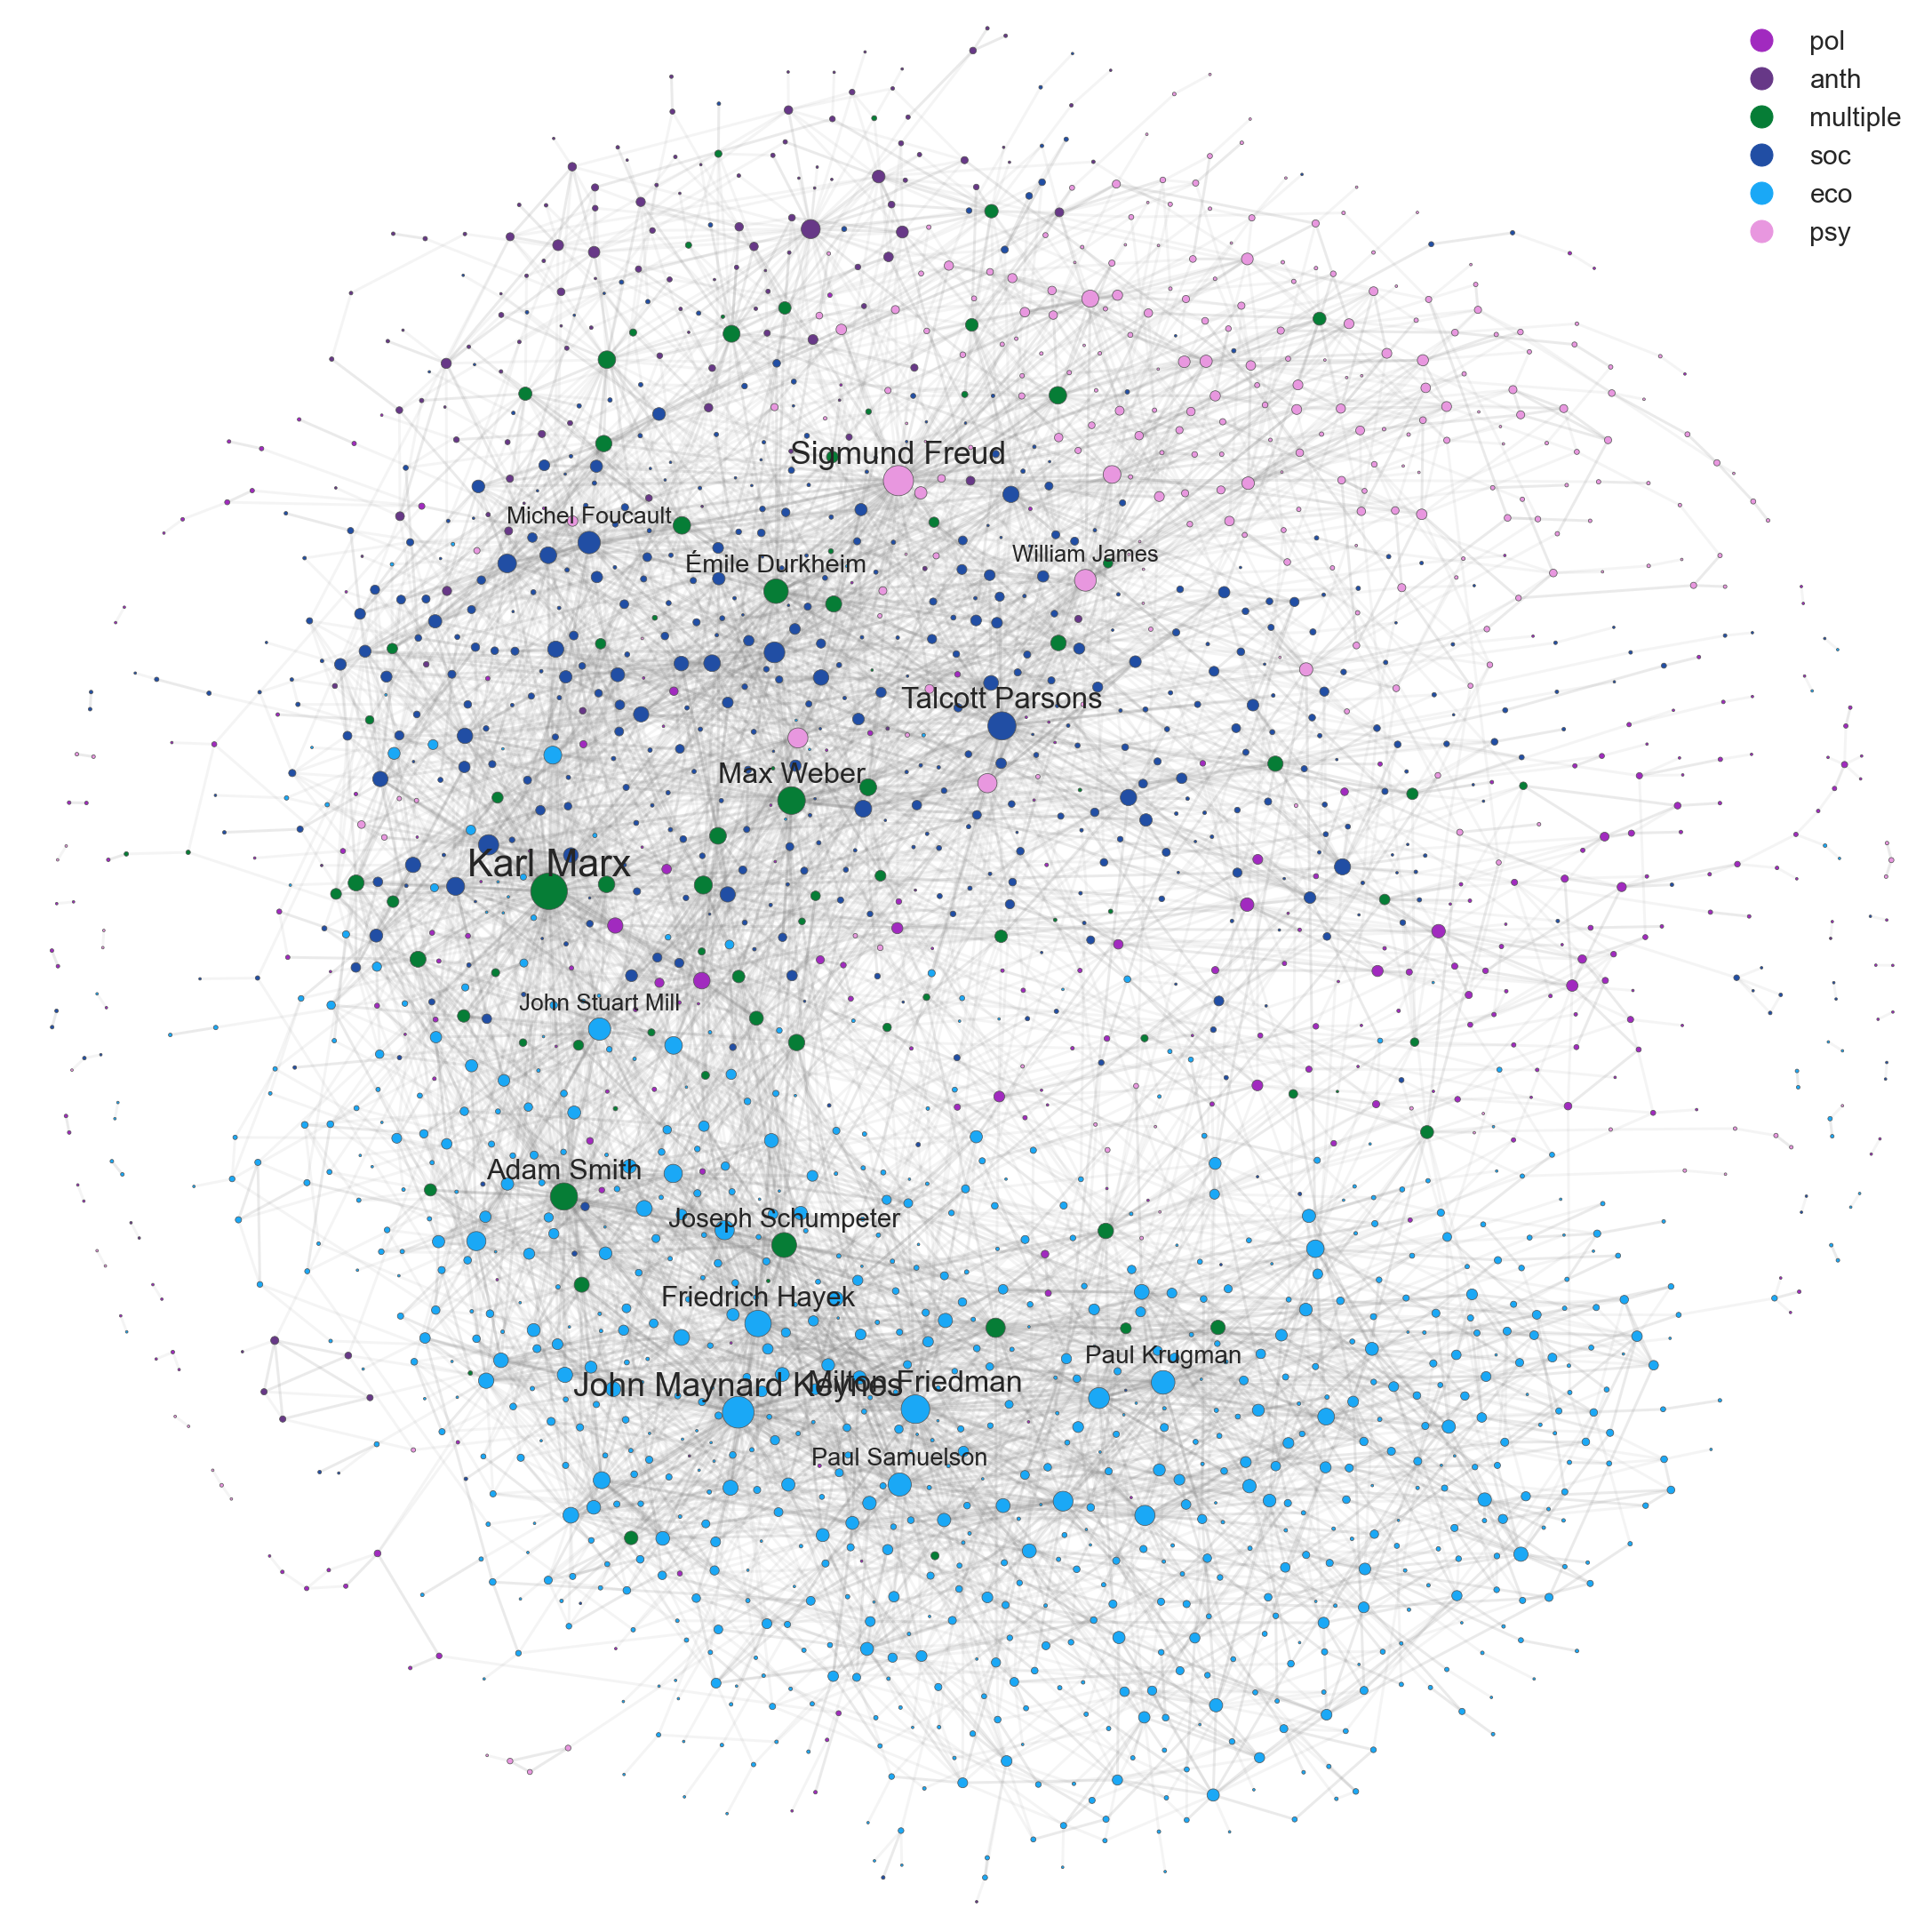

In [42]:
# Drawing the network
fig, ax = nw.draw_netwulf(network)

# assigning labels only to the largest nodes 
for node_nr in range(len(network['nodes'])):
    if network['nodes'][node_nr]['radius']>5:
        nw.tools.add_node_label(ax,
                                network,
                                dy = 12,
                                node_id = network['nodes'][node_nr]['id'],
                                size=network['nodes'][node_nr]['radius']*5)
    else:
        pass

# Drawing a big figure
plt.rcParams["figure.figsize"] = (30,30)

val_map = {inv_science_dict[node['id']]:node['color'] for node in network['nodes']}

# Add legends
for label in val_map.keys():
    ax.plot([],[],color=val_map[label], label=label, marker='o', linestyle="None", markersize = 25)

plt.legend(fontsize = 30)
# Saving as pdf
plt.savefig('title2.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

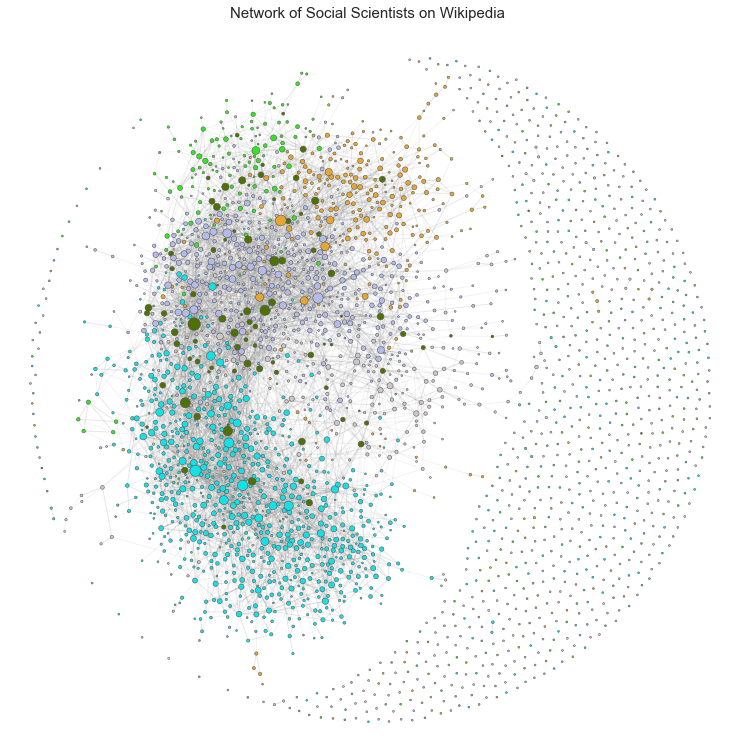

In [45]:
''' Plot network '''
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn-white')

network, config = nw.visualize(G, plot_in_cell_below=False)
fig, ax = nw.draw_netwulf(network, figsize = 10)
plt.title('Network of Social Scientists on Wikipedia', size = 15)
plt.show()

In [82]:
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn-white')

''' Degree distribution '''
def plot_deg_dist(deg_seq, title = 'Degree distribution', kwgs = {}):
    plt.style.use('ggplot')
    
    fig, ax = plt.subplots(2,1, figsize=(10,8))
    
    sns.scatterplot(x=deg_seq.keys(), y=deg_seq.values(), ax = ax[0], **kwgs)
    ax[0].set_title(title)
    ax[0].set_ylabel('Frequency', size = 15)
    
    del deg_seq[0] # messes up the log plot so remove 0 deg nodes 
    sns.scatterplot(x=deg_seq.keys(), y=deg_seq.values(), ax = ax[1], **kwgs)

    ax[1].set_title(title + ' (log scaled)')
    ax[1].set_ylabel('Frequency', size = 15)
    ax[1].set_xlabel('k', size = 15)
    # logscale the axes
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')
    
    plt.show()

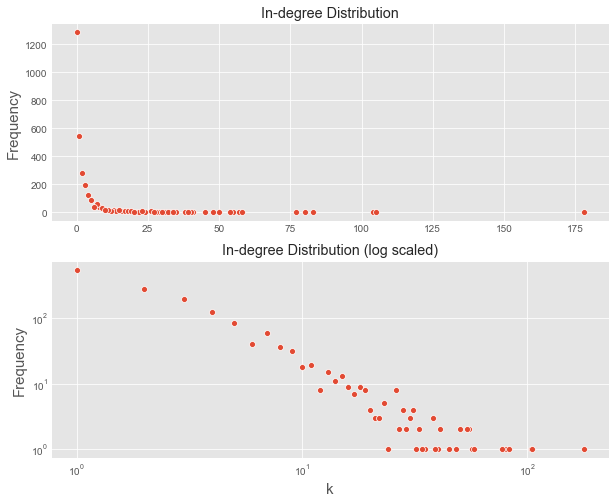

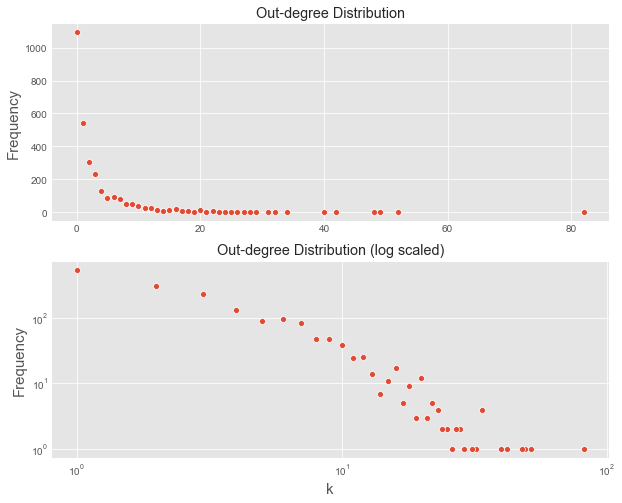

In [83]:
''' Plot degree distribution '''
import seaborn as sns
from collections import Counter

# Get in and out degree
in_deg_dist = Counter([d for n,d in G.in_degree()])
out_deg_dist = Counter([d for n,d in G.out_degree()])

plot_deg_dist(in_deg_dist, 'In-degree Distribution')
plot_deg_dist(out_deg_dist, 'Out-degree Distribution')

In [84]:
''' Plot the top X out- and in- degree nodes '''
def plot_top_nodes(top_n = 50, in_deg = True):
    if in_deg:
        top_nodes = sorted(dict(G.in_degree()).items(), key = lambda x: x[1], reverse = True)[:top_n]
    else:
        top_nodes = sorted(dict(G.out_degree()).items(), key = lambda x: x[1], reverse = True)[:top_n]
    x = [_[0] for _ in top_nodes]
    y = [_[1] for _ in top_nodes]

    fig, ax = plt.subplots(figsize = (12,6))
    sns.scatterplot(x,y, ax=ax)
    ax.set_ylabel('Degree', size = 15)
    plt.xticks(rotation=90, size = 12)
    if in_deg:
        ax.set_title(f'Distribution of in-degree for top {top_n}', size = 15)
    else:
        ax.set_title(f'Distribution of out-degree for top {top_n}', size = 15)
    plt.show()

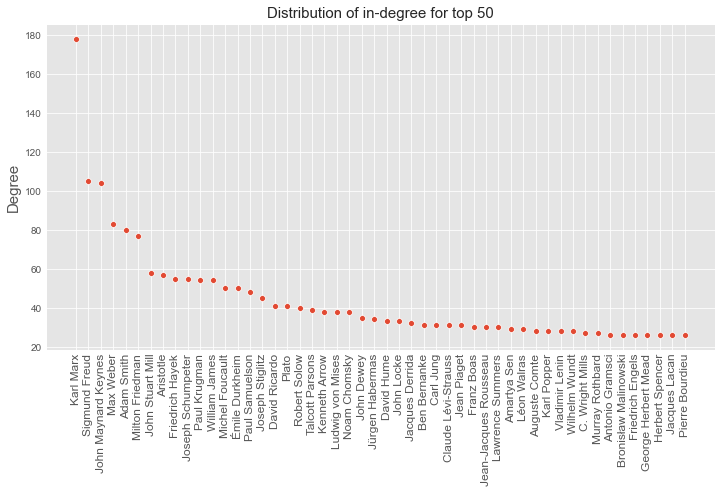

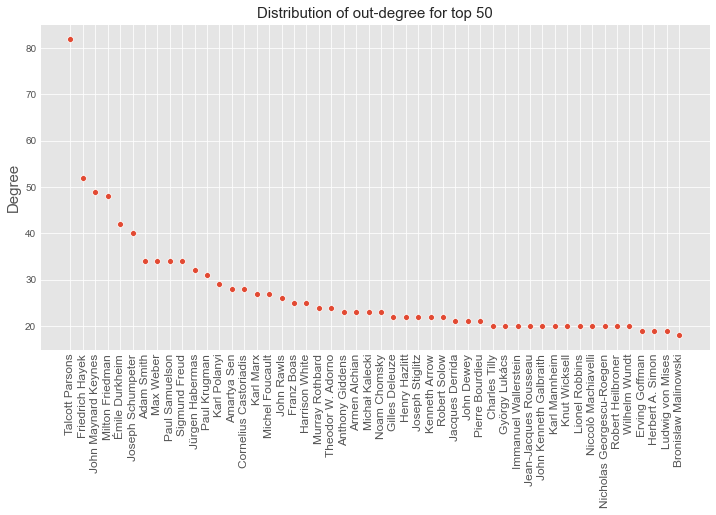

In [13]:
plot_top_nodes(in_deg = True)
plot_top_nodes(in_deg = False)

# Communities 

In [14]:
import community
from fa2 import ForceAtlas2

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:49<00:00, 20.25it/s]


BarnesHut Approximation  took  7.29  seconds
Repulsion forces  took  40.25  seconds
Gravitational forces  took  0.16  seconds
Attraction forces  took  0.09  seconds
AdjustSpeedAndApplyForces step  took  0.60  seconds


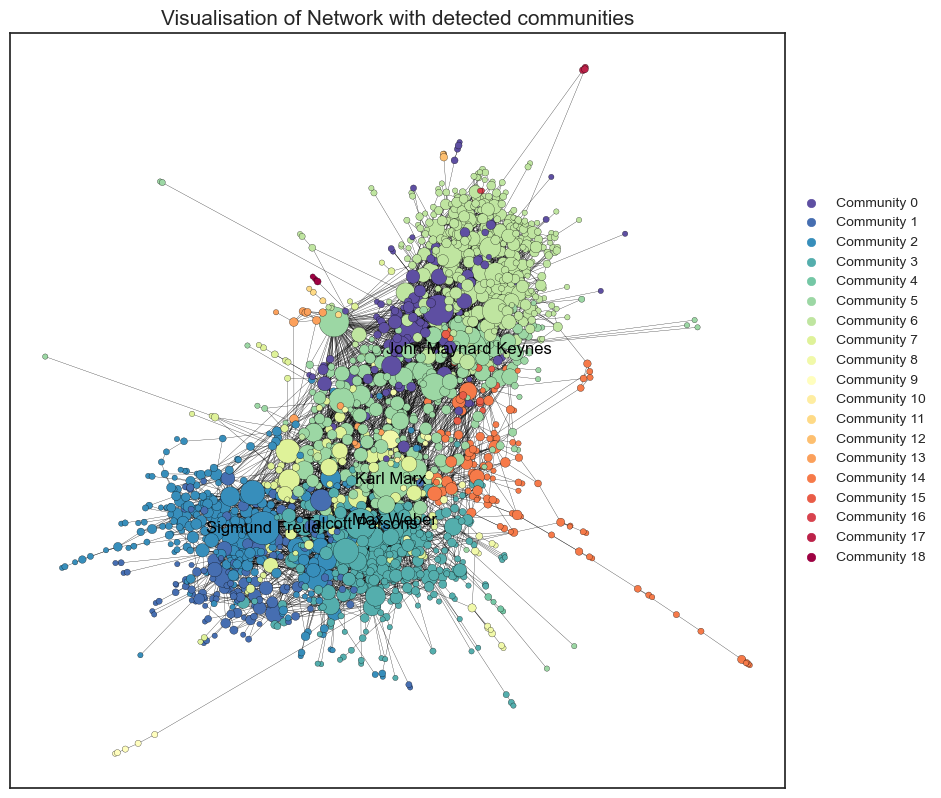

In [88]:
''' Only the GCC, otherwise there will be about 300+ communities '''
G_test = G.copy()
c = max(nx.weakly_connected_components(G_test), key=len) # largest connected component
GCC = G_test.subgraph(c).copy() # make subgraph of the largest connected component
G_undir = GCC.to_undirected().copy() # undirected

plt.style.use('seaborn-white')
# Get forceatlas positions
_pos = ForceAtlas2(outboundAttractionDistribution=True,
                   gravity=0.1,
                   verbose=True)\
       .forceatlas2_networkx_layout(G_undir, pos=None, iterations=1000)

# Louvain modularity for partition
partition = community.best_partition(G_undir)

# Get colors - use the value of the community 
c_values = list(partition.values())
# degree dict - scale node size
_d = dict(G_undir.degree) 

fig, ax = plt.subplots(dpi = 100, figsize = (10,10))

# Plot parameteres
_ks = {"node_color":c_values,
       "cmap": plt.cm.Spectral_r,
       "node_size":[10 + v*5 for v in _d.values()],
       "pos":_pos,
       "ax":ax,
       "with_labels":False,
       "edgecolors": 'black',
       "linewidths": 0.2,
       "width":0.2
       }

ax.set_title('Visualisation of Network with detected communities', size = 15)
# Set community legend
for v in set(c_values):
    plt.scatter([],[], c=[plt.cm.Spectral_r(v/max(c_values))], label='Community {}'.format(v))
    
# Place legend
plt.legend(bbox_to_anchor = (1,0.8))

nx.draw_networkx(G_undir, **_ks)

# Get top n connected nodes
top_n = 5
top_nodes = [x[0] for x in sorted(dict(G_undir.degree()).items(), key = lambda x: x[1], reverse = True)[:top_n]]

labels = {}    
for node in G_undir.nodes():
    if node in  top_nodes:
        #set the node name as the key and the label as its value 
        labels[node] = node
        
nx.draw_networkx_labels(G_undir,_pos,labels,font_size=12,font_color='black')

plt.show()

In [55]:
fig.savefig('community_detection.png', dpi=300, bbox_inches='tight')

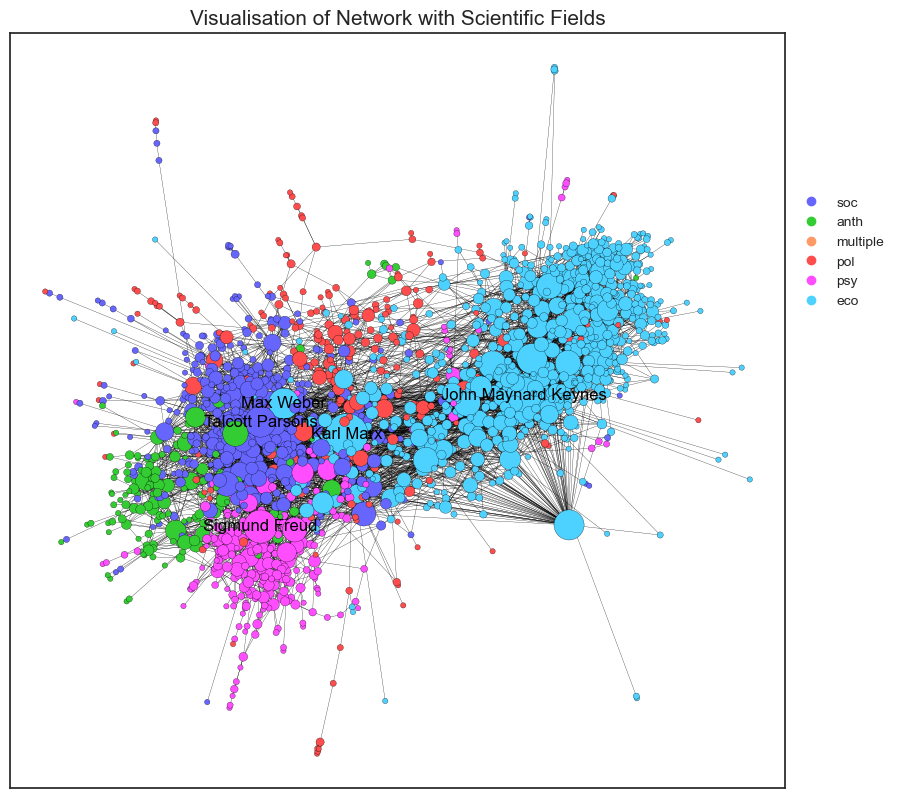

In [51]:
_field_plt(n=5)

In [50]:
def _field_plt(n=5):
    plt.style.use('seaborn-white')
    val_map = {'soc':"#6666ff",
               'anth':"#33cc33",
               'multiple':"#ff9966",
               'pol':"#ff4d4d",
               'psy': '#ff4dff',
               'eco': '#4dd2ff'}

    # Get colors - use the value of the community 
    c_values = [val_map[inv_science_dict[n]] for n in G_undir.nodes()]

    list(partition.values())
    # degree dict - scale node size
    _d = dict(G_undir.degree) 

    fig, ax = plt.subplots(dpi = 100, figsize = (10,10))

    # Plot parameteres
    _ks = {"node_color":c_values,
           "cmap": plt.cm.Spectral_r,
           "node_size":[10 + v*5 for v in _d.values()],
           "pos":_pos,
           "ax":ax,
           "with_labels":False,
           "edgecolors": 'black',
           "linewidths": 0.2,
           "width":0.2
           }

    ax.set_title('Visualisation of Network with Scientific Fields', size = 15)

    # Add legends
    for label in val_map.keys():
        ax.plot([],[],color=val_map[label], label=label, marker='o', linestyle="None")

    # Place legend
    plt.legend(bbox_to_anchor = (1,0.8))

    nx.draw_networkx(G_undir, **_ks)
    
    # Get top n connected nodes
    top_n = n
    top_nodes = [x[0] for x in sorted(dict(G_undir.degree()).items(), key = lambda x: x[1], reverse = True)[:top_n]]

    labels = {}    
    for node in G_undir.nodes():
        if node in  top_nodes:
            #set the node name as the key and the label as its value 
            labels[node] = node
            
    nx.draw_networkx_labels(G_undir,_pos,labels,font_size=12,font_color='black')
    plt.show()

prøv https://github.com/beyondbeneath/bezier-curved-edges-networkx